<a href="https://colab.research.google.com/github/Khushi-panchotiya/titanic-survival-prediction/blob/main/Titanic_survival_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic survival Project

### Step 1: Load the libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

print("✅ Libraries loaded!")

✅ Libraries loaded!


### Step 2: Import Dataset

In [ ]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print("Data loaded successfully!")
print("Rows and columns:", df.shape)
print(df.head())
print("\nColumn names:", df.columns.tolist())

Data loaded successfully!
Rows and columns: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4

### Extra: Feature Engineering

In [ ]:
df['Title'] = df['Name'].str.extract(r' ([A-Z][a-z])\.', expand=False)

df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

df['FareBin'] = pd.qcut(df['Fare'], 4, labels=[1, 2, 3, 4]).astype(int)

df['Deck'] = df['Cabin'].fillna('U').str[0]

### Step 3 clean the data

In [ ]:
print("Missing values BEFORE cleaning:")
print(df.isnull().sum())

df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1)

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df = pd.get_dummies(df, columns=['Embarked', 'Title', 'Deck'], drop_first=True)

print("\nMissing values AFTER cleaning:")
print(df.isnull().sum())

print("\nCleaned data shape:", df.shape)
print("\nFirst 5 rows after cleaning:")
print(df.head())

Missing values BEFORE cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title          366
FareBin          0
Deck             0
dtype: int64

Missing values AFTER cleaning:
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
FareBin       0
Embarked_Q    0
Embarked_S    0
Title_Mr      0
Title_Rare    0
Deck_B        0
Deck_C        0
Deck_D        0
Deck_E        0
Deck_F        0
Deck_G        0
Deck_T        0
Deck_U        0
dtype: int64

Cleaned data shape: (891, 20)

First 5 rows after cleaning:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  FareBin  Embarked_Q  \
0         0       3    0  22.0      1      0   7.2500        1       False   
1         1       1    1  38.0      1      0  71.2833        4       False   
2         

### Added new clues

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1
df = df.drop(['SibSp', 'Parch'], axis=1)

df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'MiddleAge', 'Senior'])
df = pd.get_dummies(df, columns=['AgeGroup'], drop_first=True)

df['IsWomanOrChild'] = ((df['Sex'] ==  1) | (df['Age'] < 12)).astype(int)
df['RichWoman'] = ((df['Pclass']<3) & (df['Sex'] ==1 )).astype(int)


### Step 4: Split data

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 5: Create the model

In [ ]:
model = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    radom_state=42,
    eval_metric='logloss'
)

### Step 6: Train the model

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:00:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "radom_state" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

### Feature importance

/tmp/ipython-input-4226476739.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


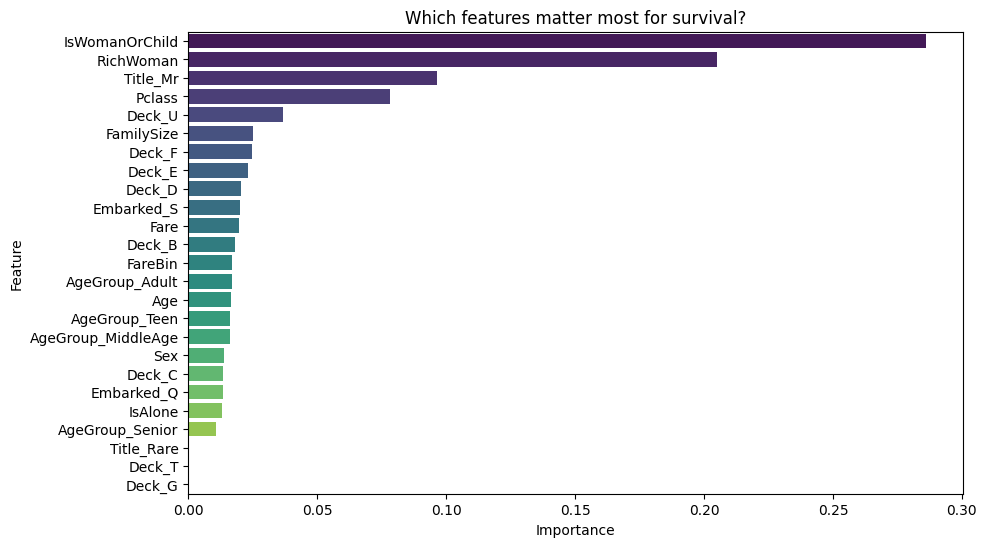

In [ ]:
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Which features matter most for survival?')
plt.show()

### Step 7: Test model

In [ ]:
predictions = model.predict(X_test)

### Step 8: Check the accuracy

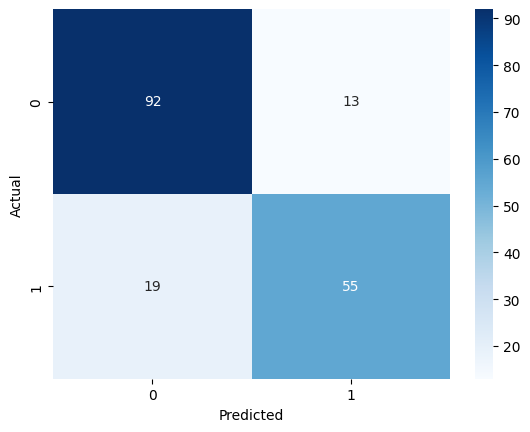

In [ ]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100: .2f}%")

Accuracy:  82.12%
